In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

# Classification
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

# Project_18

There are 2 files to be examined here related to Covid datasets:

Task 1:
    First one is worldometer_snapshots_April18_to_May18.csv where prediction is to be made for checking the death rate based on the various factors oulined below.
    
Task 2:    
    Second one is population_structure_by_age_per_contry.csv which is to predict total death w.r.t to age based on the factors provided.

In [96]:
df=pd.read_csv('worldometer_snapshots_April18_to_May18.csv')
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


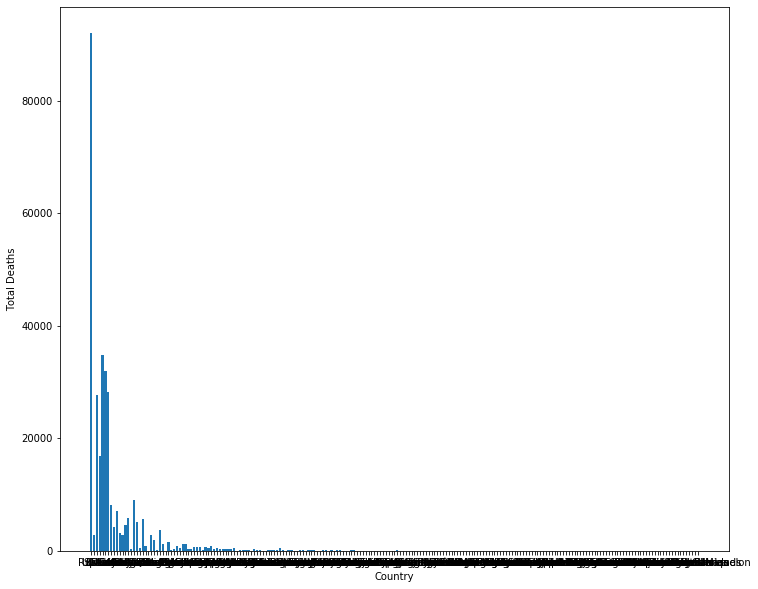

In [98]:
# Checking the Total Deaths & Country

plt.figure(figsize=(12,10))
#plt.bar(df['Total Deaths'],df['Country'])
plt.bar(df['Country'],df['Total Deaths'])

plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.show()

# Observations:

    1. Except columns Country & Date others are of numeric type, which needs to be converted.
    2  Date column should be changed to numeric for analysis purpose.
 

In [99]:
# Replace '-' with no value to make it applicable for conversion
# Change the Date column to numeric

df['Date'].replace(to_replace='[-]', value='', regex=True, inplace=True)
df['Date'] = pd.to_numeric(df['Date'])

In [100]:
# Encoding columns as part of transformation.

from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

df['Country'] = le.fit_transform(df['Country'])
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,20200418,201,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,20200418,158,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,20200418,180,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,20200418,26,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,20200418,200,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,20200518,182,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,20200518,209,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,20200518,5,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,20200518,110,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [101]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

Serious or Critical    2486
Total Deaths           1236
Total Tests            1098
Total Recovered         285
Active Cases             59
Total Cases              49
Population                0
Country                   0
Date                      0
dtype: int64

# Missing/Null Data:

    1. There are many columns which are having null values.
    2. Need to fill the null values in order to update the missing data.

In [102]:
df.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [103]:
collist=(['Total Tests', 'Total Cases','Total Deaths', 'Total Recovered', 'Serious or Critical','Active Cases'])
len(collist)

6

In [104]:
df.describe()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,6603.000000,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,2.020047e+07,106.000000,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,4.244752e+01,61.491783,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,2.020042e+07,0.000000,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,2.020042e+07,53.000000,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,2.020050e+07,106.000000,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.020051e+07,159.000000,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,2.020052e+07,212.000000,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [105]:
# Filling missing values for the columns in collist

for i in collist:
    df[i].fillna(df[i].mean(), inplace=True)
    

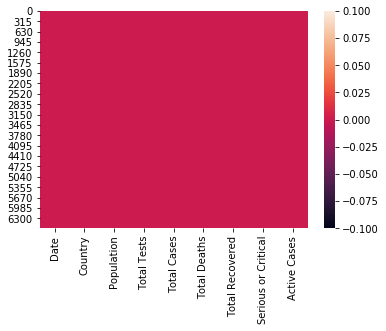

In [106]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [107]:
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,20200418,201,330774664,3.722145e+06,738792.0,39014.000000,68269.000000,13551.00000,631509.0
1,20200418,158,145927292,1.831892e+06,36793.0,313.000000,3057.000000,8.00000,33423.0
2,20200418,180,46752703,9.302300e+05,194416.0,20043.000000,74797.000000,7371.00000,99576.0
3,20200418,26,212380932,6.298500e+04,36722.0,2361.000000,14026.000000,6634.00000,20335.0
4,20200418,200,67844241,4.604370e+05,114217.0,15464.000000,5855.424185,1559.00000,98409.0
...,...,...,...,...,...,...,...,...,...
6598,20200518,182,9874,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0
6599,20200518,209,595462,2.167252e+05,6.0,1416.252096,6.000000,386.74836,0.0
6600,20200518,5,14987,2.167252e+05,3.0,1416.252096,3.000000,386.74836,0.0
6601,20200518,110,2140235,2.167252e+05,1.0,1416.252096,5855.424185,386.74836,1.0


In [108]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[1.31101588e+00, 1.54503887e+00, 2.08579650e+00, ...,
        2.71909784e+00, 1.00538508e+01, 9.54572314e+00],
       [1.31101588e+00, 8.45705489e-01, 7.76150267e-01, ...,
        1.21915610e-01, 2.89259093e-01, 3.60282544e-01],
       [1.31101588e+00, 1.20350397e+00, 7.34969097e-02, ...,
        3.00349543e+00, 5.33403840e+00, 1.37626428e+00],
       ...,
       [1.04501266e+00, 1.64262028e+00, 2.57640465e-01, ...,
        2.54965586e-01, 4.34126653e-17, 1.53029891e-01],
       [1.04501266e+00, 6.50542684e-02, 2.42583053e-01, ...,
        0.00000000e+00, 4.34126653e-17, 1.53014533e-01],
       [1.04501266e+00, 9.59550459e-01, 2.57705576e-01, ...,
        2.55052718e-01, 4.34126653e-17, 1.53029891e-01]])

In [109]:
# Removing the outliers having zscore value of more than 3.
covid_data=df[(z<3).all(axis=1)]
covid_data.shape

(6272, 9)

In [110]:
covid_data.skew()

Date                  -0.298318
Country               -0.011884
Population             3.880217
Total Tests            3.860036
Total Cases            5.183936
Total Deaths           6.225914
Total Recovered        6.921157
Serious or Critical    4.274869
Active Cases           6.120409
dtype: float64

Columns 'Population', 'Total Tests', 'Total Cases','Total Deaths', 'Total Recovered', 'Serious or Critical','Active Cases' has skewed data.



In [111]:
col = ['Population','Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases']
col

['Population',
 'Total Tests',
 'Total Cases',
 'Total Deaths',
 'Total Recovered',
 'Serious or Critical',
 'Active Cases']

In [112]:
# Reducing the skewness with boxcox1p in order to avoid 0 encountered as negative while transformation.

from scipy.special import boxcox1p
# 0 -> log transform
# .5 -> square root transform

for i in col:
    covid_data[i]=boxcox1p(covid_data[i],0)

covid_data.skew()

Date                  -0.298318
Country               -0.011884
Population            -0.794105
Total Tests           -0.647380
Total Cases           -0.018856
Total Deaths           0.143726
Total Recovered        0.064313
Serious or Critical   -0.367581
Active Cases          -0.080849
dtype: float64

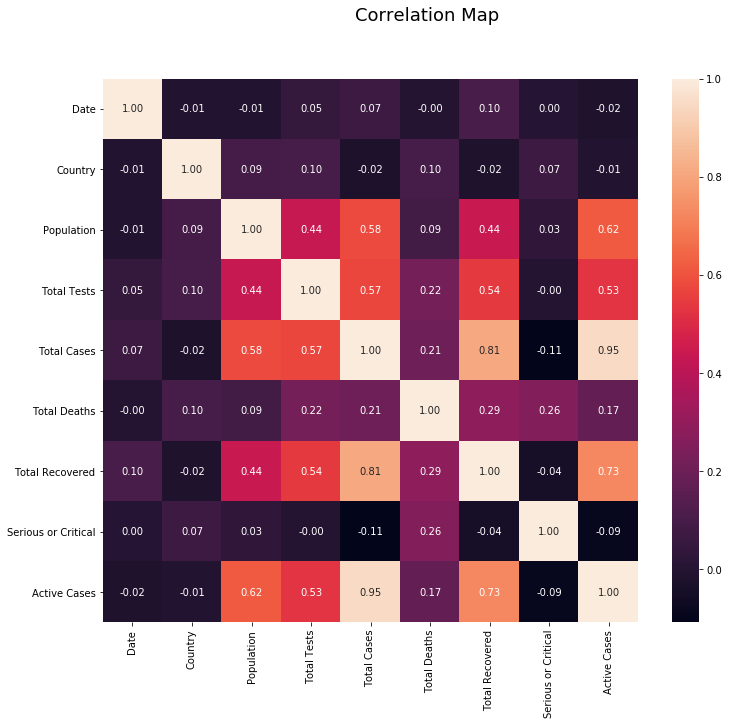

In [113]:
plt.figure(figsize=(12,10)) 
sns.heatmap(covid_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [114]:
# Setting x  by excluding Total Deaths column which is y here for prediction.
x=covid_data.drop(['Total Deaths'],axis=1)
x

,Date,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases
1,20200418,158,18.798619,14.420860,10.513090,8.025516,2.197225,10.417029
4,20200418,200,18.032725,13.039933,11.645864,8.675294,7.352441,11.496898
8,20200418,197,18.249063,13.302907,11.318491,9.254740,7.546974,11.156065
9,20200418,93,18.244691,12.707266,11.300586,10.932893,8.164510,9.896010
11,20200418,152,17.309466,11.819645,9.576441,8.807621,4.770685,8.907748
...,...,...,...,...,...,...,...,...
6598,20200518,182,9.197762,12.286390,1.945910,1.945910,5.960357,0.000000
6599,20200518,209,13.297095,12.286390,1.945910,1.945910,5.960357,0.000000
6600,20200518,5,9.615005,12.286390,1.386294,1.386294,5.960357,0.000000
6601,20200518,110,14.576427,12.286390,0.693147,8.675294,5.960357,0.693147


In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
#scale = MinMaxScaler()
x=scale.fit_transform(x)

In [116]:
# Settng Y
y=covid_data['Total Deaths']
y

1       5.749393
4       9.646335
8       7.544861
9       8.523573
11      5.855072
          ...   
6598    7.256475
6599    7.256475
6600    7.256475
6601    7.256475
6602    7.256475
Name: Total Deaths, Length: 6272, dtype: float64

In [117]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  56  is  0.17854296413650272


In [118]:
# Setting the test x & y values and using the random state from above step.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=56)

In [119]:
train_x.shape

(4704, 8)

In [120]:
train_y.shape

(4704,)

In [121]:
test_x.shape

(1568, 8)

In [122]:
test_y.shape

(1568,)

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [124]:
KNN=KNeighborsRegressor(n_neighbors=10)
SV=SVR()
LR=LinearRegression()
DT=DecisionTreeRegressor(random_state=10)
RF = RandomForestRegressor(n_estimators=100,random_state=10)
AD = AdaBoostRegressor()
GB = GradientBoostingRegressor()

In [125]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [126]:
Model=[]
score=[]
cvs=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 2.2488792760678766
Mean squared error 6.819290148274827
Root Mean absolute error 2.6113770597665185
Score:  0.8286119875121787


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 2.2488792760678766
Mean squared error 6.819290148274827
Root Mean absolute error 2.6113770597665185
Score:  0.47557100999758595


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 2.2488792760678766
Mean squared error 6.819290148274827
Root Mean absolute error 2.6113770597665185
Score:  0.1869937009641477


-------

In [127]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,82.861199
1,SVR,47.557101
2,LinearRegression,18.699370
3,DecisionTreeRegressor,93.940001
4,RandomForestRegressor,94.083960
5,AdaBoostRegressor,33.913119
6,GradientBoostingRegressor,74.303166


# RandomForestRegressor seems to be the best model with over 94% accuracy.

In [128]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
covid_data.to_csv('covidDeath_Predict.csv')
predictData

,0
0,2.603167
1,5.165877
2,3.862211
3,3.436781
4,2.456458
...,...
1563,5.963958
1564,2.569942
1565,6.730839
1566,1.669157


In [129]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(RF,"RF_CovidDeath.pkl")

['RF_CovidDeath.pkl']

# Task 2:    
    Second one is population_structure_by_age_per_contry.csv which is to predict total death w.r.t age based on the factors provided.

In [130]:
df1=pd.read_csv('population_structure_by_age_per_contry.csv')
df1.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


# Observations:

    1. This data set contains list of countries and the death rate across age brackets (0-14), (15-64) & 65+ agre group people.
    
    2. Combining the 2 data sets df and df1 (to add Fraction age 65+ years) in order to predict total death w.r.t age.

In [131]:
# Checking which all columns have null values
df1.isnull().sum().sort_values(ascending=False)

Fraction age 65+ years      37
Fraction age 15-64 years    37
Fraction age 0-14 years     37
Country                      0
dtype: int64

In [132]:
collist=['Fraction age 0-14 years','Fraction age 65+ years','Fraction age 15-64 years']
len(collist)

3

In [133]:
# Filling missing values for the columns in collist

for i in collist:
    df1[i].fillna(df1[i].median(), inplace=True)
    
df1.describe()

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,213.000000,213.000000,213.000000
mean,0.274431,0.638348,0.083522
std,0.097055,0.060655,0.057545
min,0.115000,0.472000,0.011000
25%,0.191000,0.607000,0.038000
50%,0.266500,0.649000,0.063500
75%,0.335000,0.667000,0.114000
max,0.502000,0.850000,0.270000


In [134]:
# Encoding columns as part of transformation.

from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

df1['Country'] = le.fit_transform(df1['Country'])
df1

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,201,0.1890,0.657,0.1540
1,158,0.1760,0.682,0.1420
2,180,0.1470,0.659,0.1940
3,26,0.2170,0.697,0.0860
4,200,0.1770,0.638,0.1850
...,...,...,...,...
208,182,0.2665,0.649,0.0635
209,209,0.2665,0.649,0.0635
210,5,0.2665,0.649,0.0635
211,110,0.3540,0.601,0.0450


In [135]:
#df1.columns
country_pop_df = df1.loc[:,['Country','Fraction age 65+ years']]
country_pop_df

,Country,Fraction age 65+ years
0,201,0.1540
1,158,0.1420
2,180,0.1940
3,26,0.0860
4,200,0.1850
...,...,...
208,182,0.0635
209,209,0.0635
210,5,0.0635
211,110,0.0450


In [136]:
covid_data = covid_data.merge(country_pop_df, on='Country')
covid_data.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 65+ years
0,20200418,158,18.798619,14.420860,10.513090,5.749393,8.025516,2.197225,10.417029,0.142
1,20200419,158,18.798619,14.478199,10.665554,5.891644,8.099251,2.197225,10.576483,0.142
2,20200420,158,18.798619,14.534969,10.760495,6.006353,8.145260,6.552508,10.675238,0.142
3,20200421,158,18.798619,14.577533,10.873584,6.124683,8.262043,6.552508,10.787978,0.142
4,20200422,158,18.798619,14.626441,10.968198,6.242223,8.394121,6.552508,10.879311,0.142


In [137]:
covid_data.shape

(6272, 10)

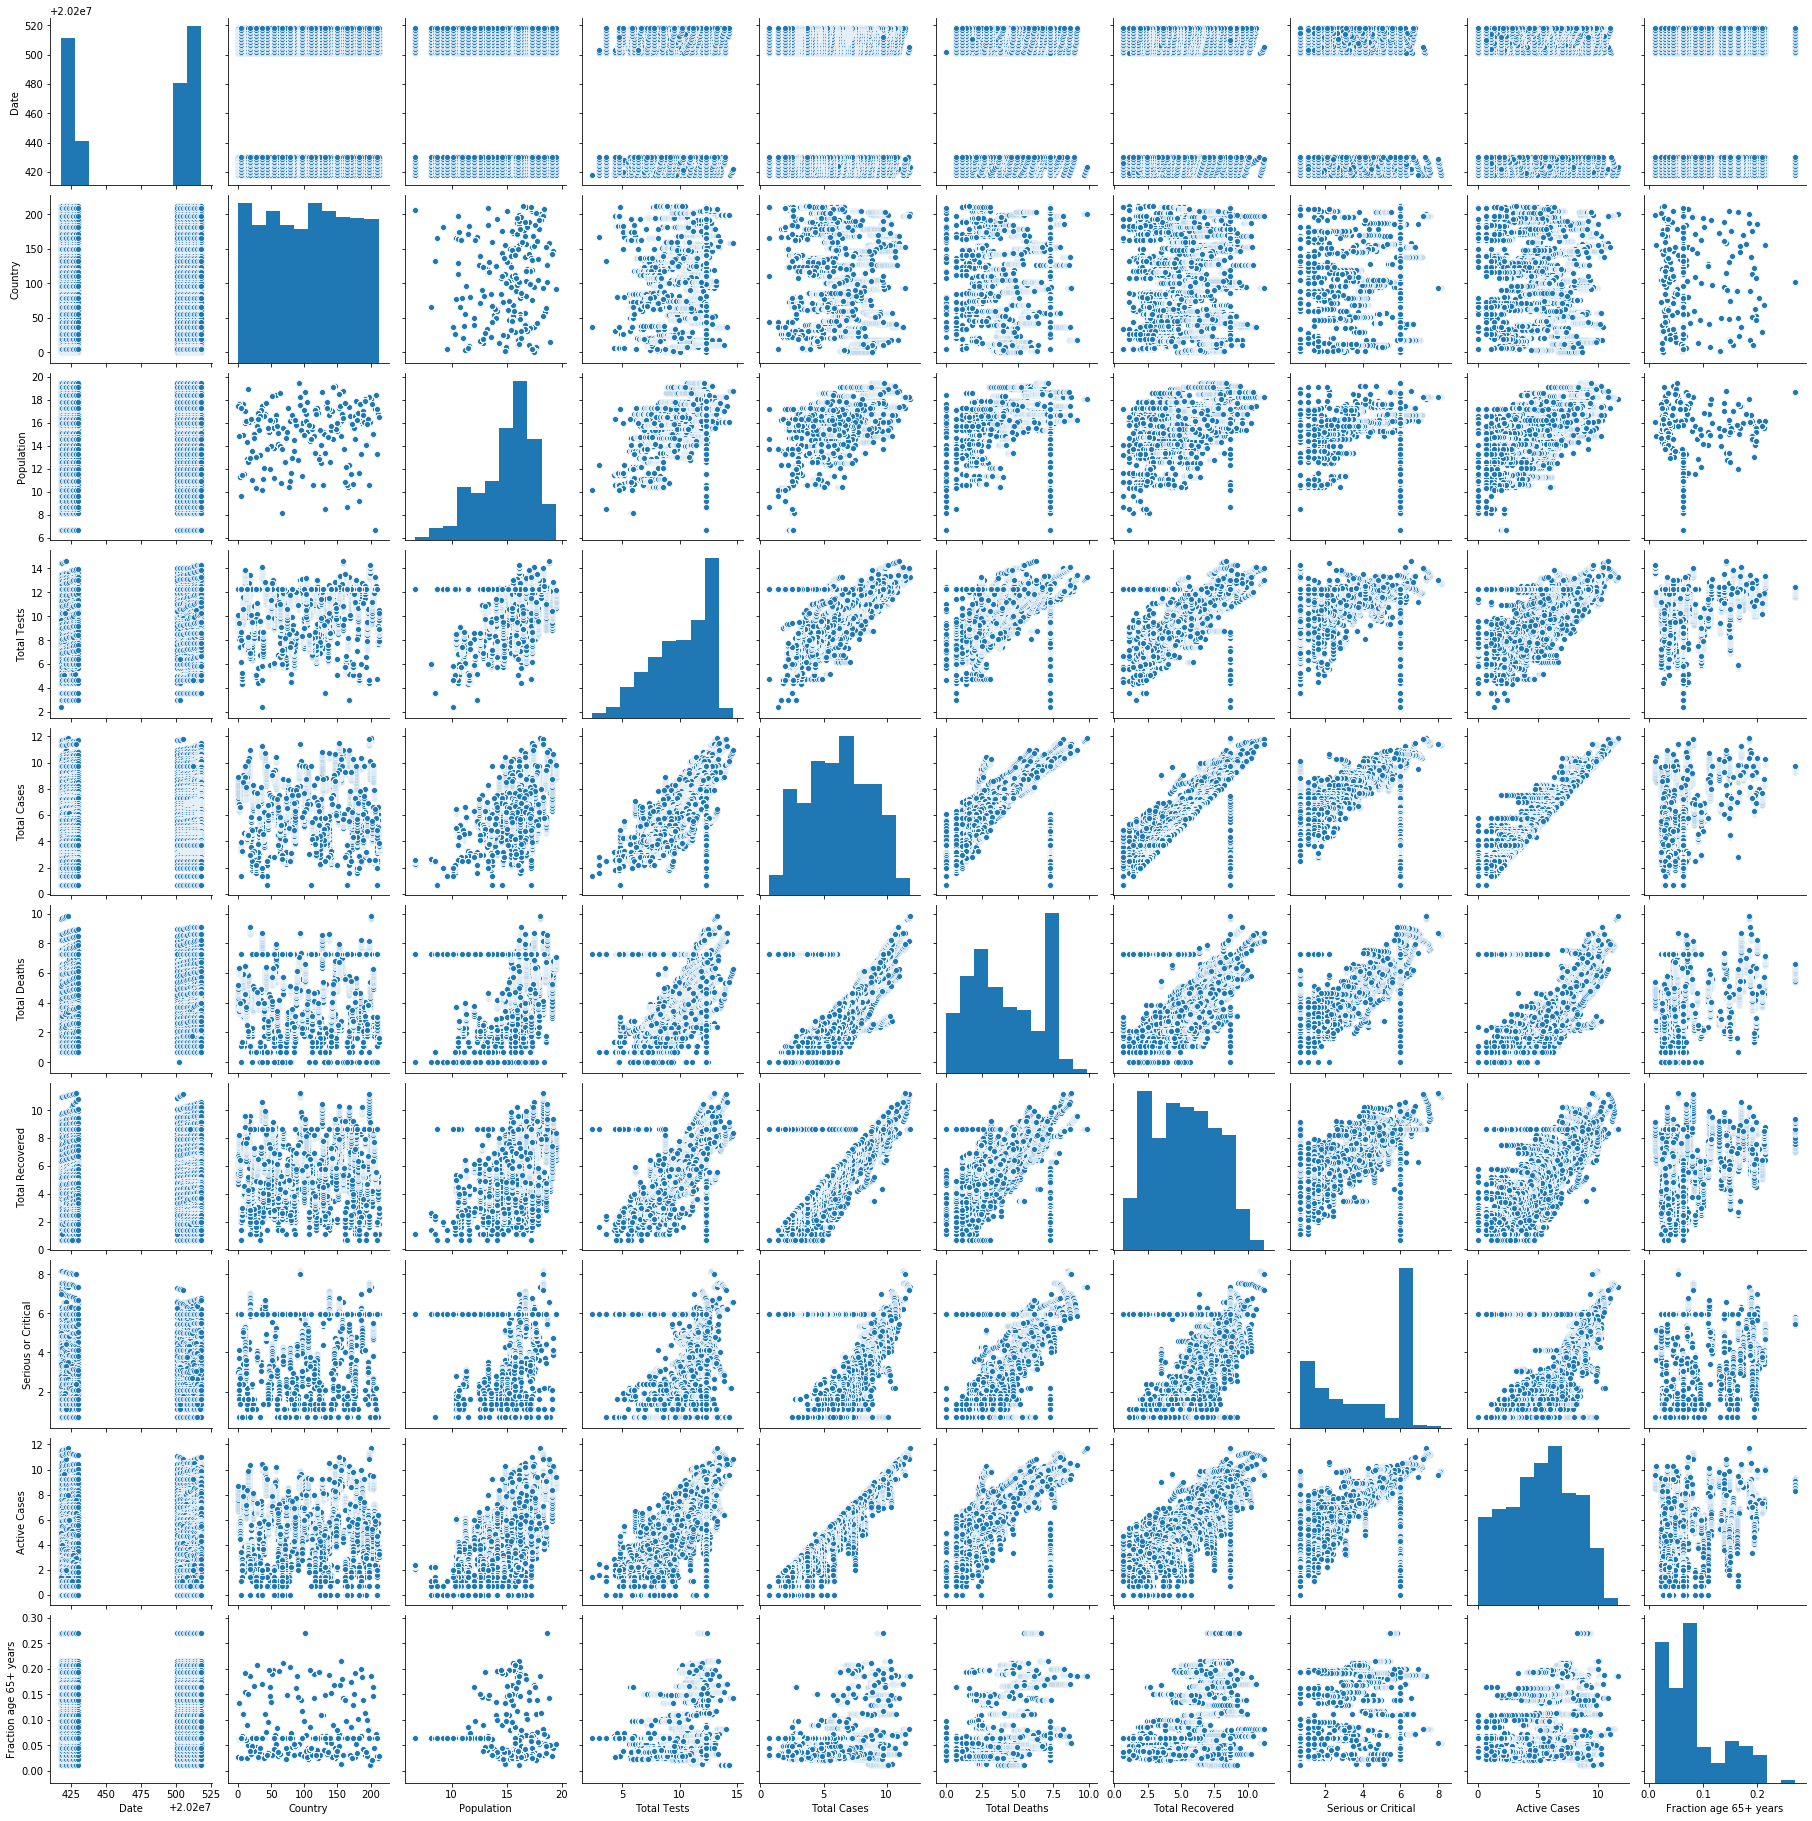

In [138]:
sns.pairplot(covid_data)

In [139]:
df1.describe()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,213.000000,213.000000,213.000000,213.000000
mean,106.000000,0.274431,0.638348,0.083522
std,61.631972,0.097055,0.060655,0.057545
min,0.000000,0.115000,0.472000,0.011000
25%,53.000000,0.191000,0.607000,0.038000
50%,106.000000,0.266500,0.649000,0.063500
75%,159.000000,0.335000,0.667000,0.114000
max,212.000000,0.502000,0.850000,0.270000


In [140]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore
z= np.abs(zscore(covid_data))
z

array([[1.30329916, 0.85256751, 1.53439348, ..., 0.8873063 , 1.85461817,
        1.11931007],
       [1.27976376, 0.85256751, 1.53439348, ..., 0.8873063 , 1.91227684,
        1.11931007],
       [1.25622836, 0.85256751, 1.53439348, ..., 1.22485471, 1.94798678,
        1.11931007],
       ...,
       [1.00317025, 0.96643129, 2.5812949 , ..., 0.9376819 , 1.91219733,
        0.30088335],
       [1.02670565, 0.96643129, 2.5812949 , ..., 0.9376819 , 1.91219733,
        0.30088335],
       [1.05024106, 0.96643129, 2.5812949 , ..., 0.9376819 , 1.91219733,
        0.30088335]])

In [141]:
# Removing the outliers having zscore value of more than 3.
covidDeath_data=covid_data[(z<3).all(axis=1)]
covidDeath_data.shape

(6209, 10)

In [142]:
covidDeath_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6209 entries, 0 to 6271
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6209 non-null   int64  
 1   Country                 6209 non-null   int32  
 2   Population              6209 non-null   float64
 3   Total Tests             6209 non-null   float64
 4   Total Cases             6209 non-null   float64
 5   Total Deaths            6209 non-null   float64
 6   Total Recovered         6209 non-null   float64
 7   Serious or Critical     6209 non-null   float64
 8   Active Cases            6209 non-null   float64
 9   Fraction age 65+ years  6209 non-null   float64
dtypes: float64(8), int32(1), int64(1)
memory usage: 509.3 KB


In [143]:
covidDeath_data.skew()

Date                     -0.298568
Country                  -0.010861
Population               -0.712969
Total Tests              -0.630223
Total Cases              -0.017109
Total Deaths              0.163584
Total Recovered           0.075096
Serious or Critical      -0.350444
Active Cases             -0.084933
Fraction age 65+ years    1.039501
dtype: float64

In [144]:
covidDeath_data['Country'].unique()

array([158, 200, 197,  93, 152,  36, 168,  18, 127,  41, 138, 147, 156,
        57, 187,  17, 186, 155, 173,  95, 199,  15, 154, 203,  92, 157,
        97, 178,  43,  11, 105,  58,  56, 153, 161,  53, 170, 149,  51,
         7, 145,   2,  14,   0,  10, 133, 119, 103,  68, 143, 128,  76,
       146,   8,  23, 115,  94,  89,  35,  12, 192,  78,  83, 205,  87,
       184, 169,  24,  29,  47,  99,  82,  48, 144,  90,  62, 190, 114,
        52,  54, 140, 175, 176, 177,  72,  59, 126, 106, 120,  88, 196,
        84, 108, 181,   1, 109,  50, 104, 142, 121,  46,  30, 151,   3,
       211, 204,  60,  74, 166, 102, 207, 122,  40,  86, 100,  39, 172,
       191, 160, 189,  45, 148, 137,  64,  20,  96, 125, 194,  33,  32,
       131, 208, 117, 159, 179, 202, 167, 111,  70,  63, 123, 135,  65,
        81,  77, 134,  28, 130, 210,  21,  85,  34, 195,   9, 129,  13,
        38,  16, 113, 124, 174, 118, 112,  71, 188,   4, 212, 116,  31,
       164,  61, 141,   6,  25,  73, 193,  80,  22, 107,  19,  6

In [145]:
len(covidDeath_data['Country'].unique())

203

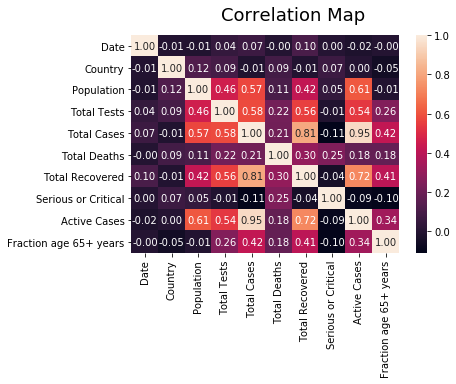

In [146]:
#plt.figure(figsize=(20,10)) 
sns.heatmap(covidDeath_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

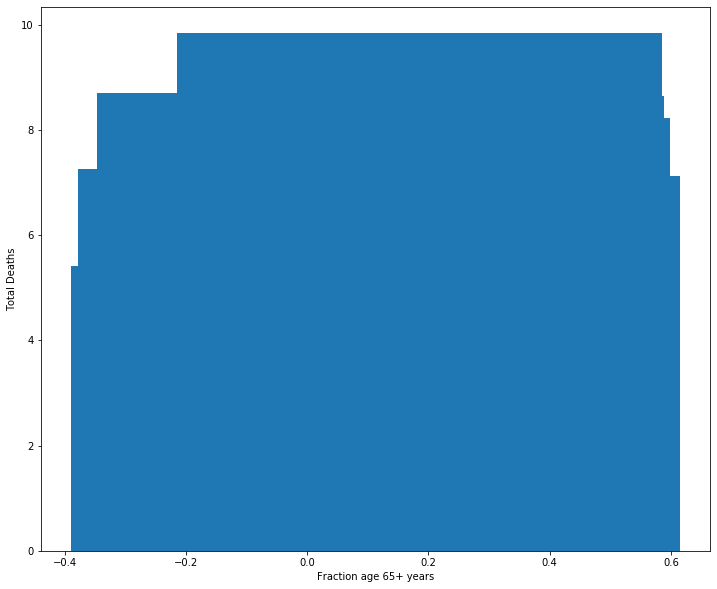

In [147]:
# Checking the Total Deaths & w.r.t Age
plt.figure(figsize=(12,10))
plt.bar(covidDeath_data['Fraction age 65+ years'],covidDeath_data['Total Deaths'])

plt.xlabel('Fraction age 65+ years')
plt.ylabel('Total Deaths')
plt.show()

In [148]:
# Setting x  by excluding Total Deaths column which is y here for prediction.
x=covidDeath_data.drop(['Total Deaths'],axis=1)
x

,Date,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases,Fraction age 65+ years
0,20200418,158,18.798619,14.420860,10.513090,8.025516,2.197225,10.417029,0.1420
1,20200419,158,18.798619,14.478199,10.665554,8.099251,2.197225,10.576483,0.1420
2,20200420,158,18.798619,14.534969,10.760495,8.145260,6.552508,10.675238,0.1420
3,20200421,158,18.798619,14.577533,10.873584,8.262043,6.552508,10.787978,0.1420
4,20200422,158,18.798619,14.626441,10.968198,8.394121,6.552508,10.879311,0.1420
...,...,...,...,...,...,...,...,...,...
6267,20200514,165,8.665268,12.286390,0.693147,0.693147,5.960357,0.000000,0.0635
6268,20200515,165,8.665268,12.286390,0.693147,0.693147,5.960357,0.000000,0.0635
6269,20200516,165,8.665268,12.286390,0.693147,0.693147,5.960357,0.000000,0.0635
6270,20200517,165,8.665268,12.286390,0.693147,0.693147,5.960357,0.000000,0.0635


In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
#scale = MinMaxScaler()
x=scale.fit_transform(x)

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scale = StandardScaler()
scale = MinMaxScaler()
x=scale.fit_transform(x)

In [151]:
# Settng Y
y=covidDeath_data['Total Deaths']
y

0       5.749393
1       5.891644
2       6.006353
3       6.124683
4       6.242223
          ...   
6267    7.256475
6268    7.256475
6269    7.256475
6270    7.256475
6271    7.256475
Name: Total Deaths, Length: 6209, dtype: float64

In [152]:

max_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lm=LinearRegression()
    lm.fit(train_x,train_y)
    pred=lm.predict(test_x)
    score=lm.score(x,y)
    #print("Score corresponding to r_state: ",r_state," is ",score)
    if(score>max_score):
        max_score=score
        final_rstate=r_state
        
print("\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_score)



Max_accuracy_Score corresponding to final_r_state:  64  is  0.18055089605033847


In [153]:
# Setting the test x & y values and using the random state from above step.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=64)

In [154]:
train_x.shape

(4656, 9)

In [155]:
train_y.shape

(4656,)

In [156]:
test_x.shape

(1553, 9)

In [157]:
test_y.shape

(1553,)

In [158]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [159]:
models=[]
models.append(('KNeighborsRegressor',KNN))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DT))
models.append(('RandomForestRegressor',RF))
models.append(('AdaBoostRegressor',AD))
models.append(('GradientBoostingRegressor',GB))

In [160]:
Model=[]
score=[]
cvs=[]
mae=[]
mse=[]
rmae=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    # Metrics
    m1=mean_absolute_error(test_y,pred)
    print("Mean absolute error",m1)
    mae.append(m1)
           
    m2=mean_squared_error(test_y,pred)
    print("Mean squared error",m2)
    mse.append(m2)
    
    
    m3=np.sqrt(mean_squared_error(test_y,pred))
    print("Root Mean absolute error",m3)
    rmae.append(m3)
    
    #Model performance
    modelscore=model.score(test_x,test_y)
    print("Score: ",modelscore )
    score.append(modelscore*100)
    print("\n")

-------------- KNeighborsRegressor --------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
Mean absolute error 2.222554071518216
Mean squared error 6.783953898750178
Root Mean absolute error 2.604602445431966
Score:  0.8381506643121263


-------------- SVR --------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Mean absolute error 2.222554071518216
Mean squared error 6.783953898750178
Root Mean absolute error 2.604602445431966
Score:  0.43496493866719654


-------------- LinearRegression --------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error 2.222554071518216
Mean squared error 6.783953898750178
Root Mean absolute error 2.604602445431966
Score:  0.1685194418768079


-------------

In [161]:
#result=pd.DataFrame({"Model": Model, "Score": score, "Cross Val Score":cvs})
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsRegressor,83.815066
1,SVR,43.496494
2,LinearRegression,16.851944
3,DecisionTreeRegressor,90.034815
4,RandomForestRegressor,94.514799
5,AdaBoostRegressor,36.792847
6,GradientBoostingRegressor,75.008450


# RandomForestRegressor seems to be the best model with over 94% accuracy.

In [162]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
covid_data.to_csv('covidDeathAge_Predict.csv')
predictData

,0
0,3.148621
1,2.499095
2,2.249584
3,4.780469
4,4.212262
...,...
1548,1.118213
1549,4.706722
1550,5.785460
1551,5.148543


In [163]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(RF,"RF_CovidDeathAge.pkl")

['RF_CovidDeathAge.pkl']